In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import sys
!{sys.executable} -m pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

656

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

   # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethanien
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | trinidad
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | inhambane
Processing Record 8 of Set 1 | mitu
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | parana
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | lensk
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | xiaoweizhai
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | tres arroyos
Processing Record 22 of Set 1 | saint-georges
Processing Record 23 of Set 1 | hobart
P

Processing Record 36 of Set 4 | verkhoyansk
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | dikson
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | rawson
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | acarau
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | hohhot
Processing Record 46 of Set 4 | ishinomaki
Processing Record 47 of Set 4 | katangli
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | kapaa
Processing Record 2 of Set 5 | nizhniy kuranakh
Processing Record 3 of Set 5 | delta del tigre
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | makakilo city
Processing Record 6 of Set 5 | timmins
Processing Record 7 of Set 5 | yumen
Processing Record 8 of Set 5 | jiazi
Processing Record 9 of Set 5 | yerboga

Processing Record 24 of Set 8 | pengcheng
Processing Record 25 of Set 8 | bintulu
Processing Record 26 of Set 8 | dourbali
Processing Record 27 of Set 8 | toungoo
City not found. Skipping...
Processing Record 28 of Set 8 | solvychegodsk
Processing Record 29 of Set 8 | dingle
Processing Record 30 of Set 8 | batagay
Processing Record 31 of Set 8 | sorvag
City not found. Skipping...
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | winnemucca
Processing Record 34 of Set 8 | kharan
Processing Record 35 of Set 8 | hokitika
Processing Record 36 of Set 8 | stoyba
City not found. Skipping...
Processing Record 37 of Set 8 | simao
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | iranshahr
Processing Record 40 of Set 8 | sorong
Processing Record 41 of Set 8 | otradnoye
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | tommot
Processing Record 45 of Set 8 | bontang
Processing Record 46 of

Processing Record 10 of Set 12 | ponta do sol
Processing Record 11 of Set 12 | sao felix do xingu
Processing Record 12 of Set 12 | lobito
Processing Record 13 of Set 12 | faya
Processing Record 14 of Set 12 | teknaf
Processing Record 15 of Set 12 | taoudenni
Processing Record 16 of Set 12 | coacoyul
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | ormond beach
Processing Record 19 of Set 12 | tabou
Processing Record 20 of Set 12 | mengcheng
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | sochaczew
Processing Record 23 of Set 12 | vvedenka
Processing Record 24 of Set 12 | beaverlodge
Processing Record 25 of Set 12 | wa
City not found. Skipping...
Processing Record 26 of Set 12 | hambantota
Processing Record 27 of Set 12 | padang
Processing Record 28 of Set 12 | esso
Processing Record 29 of Set 12 | cehegin
Processing Record 30 of Set 12 | atka
City not found. Skipping...
Processing Record 31 of Set 12 | vysokogornyy
Processing Record

In [15]:
len(city_data)

602

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethanien,-26.5020,17.1583,52.83,47,0,10.36,NA,2022-05-07 19:01:44
1,Mataura,-46.1927,168.8643,57.47,98,100,2.15,NZ,2022-05-07 19:01:44
2,Trinidad,-14.8333,-64.9000,86.16,35,22,3.65,BO,2022-05-07 19:01:45
3,Poum,-20.2333,164.0167,76.84,70,34,17.69,NC,2022-05-07 19:01:13
4,Bambous Virieux,-20.3428,57.7575,77.22,79,22,14.83,MU,2022-05-07 19:01:45
5,Salalah,17.0151,54.0924,80.80,80,15,6.13,OM,2022-05-07 19:01:46
6,Inhambane,-23.8650,35.3833,71.37,81,0,4.76,MZ,2022-05-07 19:01:46
7,Mitu,1.1983,-70.1733,79.07,74,94,3.49,CO,2022-05-07 19:01:47
8,Lavrentiya,65.5833,-171.0000,26.01,96,72,6.20,RU,2022-05-07 19:01:47
9,Hermanus,-34.4187,19.2345,55.80,79,15,7.31,ZA,2022-05-07 19:01:48


In [17]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethanien,NA,2022-05-07 19:01:44,-26.5020,17.1583,52.83,47,0,10.36
1,Mataura,NZ,2022-05-07 19:01:44,-46.1927,168.8643,57.47,98,100,2.15
2,Trinidad,BO,2022-05-07 19:01:45,-14.8333,-64.9000,86.16,35,22,3.65
3,Poum,NC,2022-05-07 19:01:13,-20.2333,164.0167,76.84,70,34,17.69
4,Bambous Virieux,MU,2022-05-07 19:01:45,-20.3428,57.7575,77.22,79,22,14.83
5,Salalah,OM,2022-05-07 19:01:46,17.0151,54.0924,80.80,80,15,6.13
6,Inhambane,MZ,2022-05-07 19:01:46,-23.8650,35.3833,71.37,81,0,4.76
7,Mitu,CO,2022-05-07 19:01:47,1.1983,-70.1733,79.07,74,94,3.49
8,Lavrentiya,RU,2022-05-07 19:01:47,65.5833,-171.0000,26.01,96,72,6.20
9,Hermanus,ZA,2022-05-07 19:01:48,-34.4187,19.2345,55.80,79,15,7.31


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

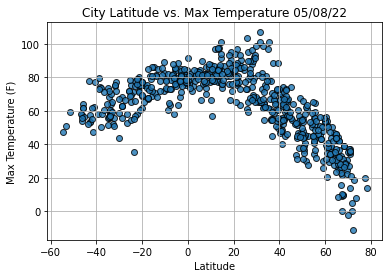

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

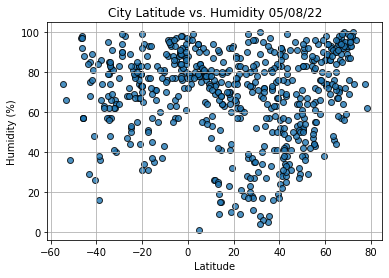

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


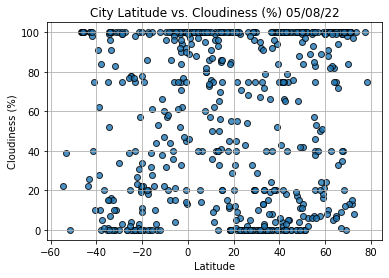

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

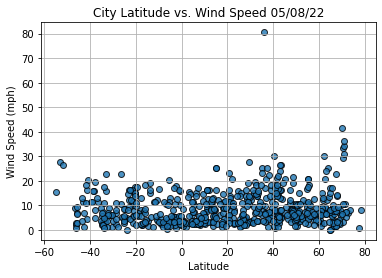

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Salalah,OM,2022-05-07 19:01:46,17.0151,54.0924,80.80,80,15,6.13
7,Mitu,CO,2022-05-07 19:01:47,1.1983,-70.1733,79.07,74,94,3.49
8,Lavrentiya,RU,2022-05-07 19:01:47,65.5833,-171.0000,26.01,96,72,6.20
12,Ilulissat,GL,2022-05-07 19:01:49,69.2167,-51.1000,28.42,59,0,6.91
13,Lensk,RU,2022-05-07 19:01:50,60.7253,114.9278,37.56,87,100,6.51


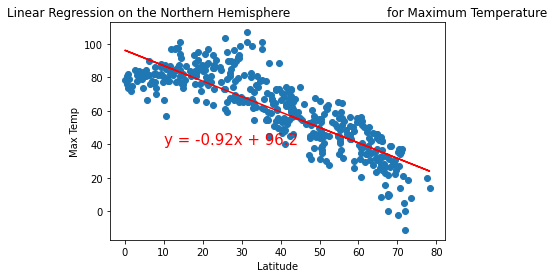

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

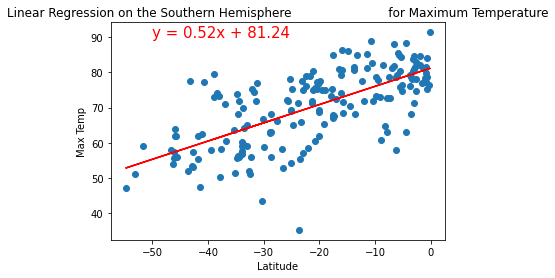

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

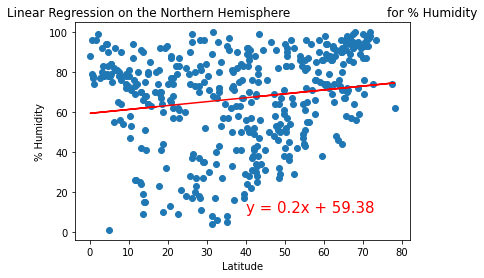

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

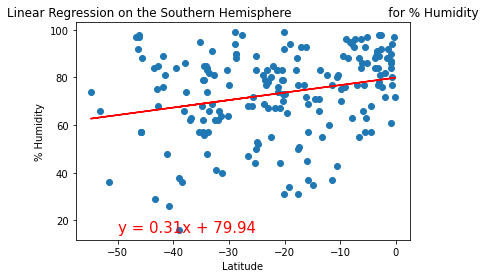

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

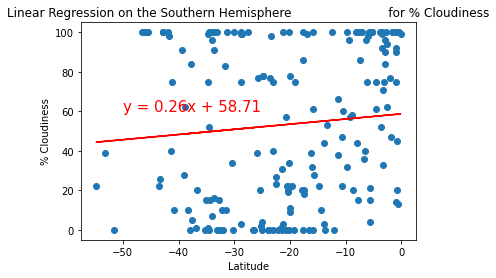

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

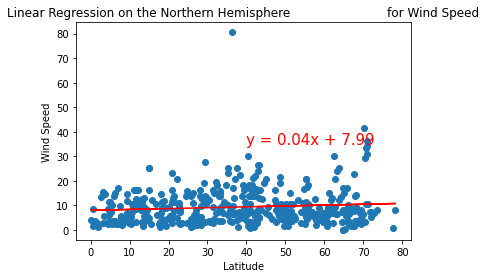

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

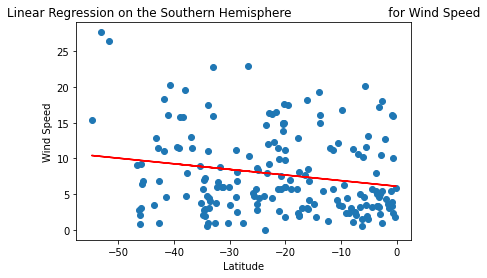

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))